# SkillCorner Off-Ball Run Radars:

This notebook requests player averages within the given season & competition selection for all players that meet the match/minute thresholds. Once the data has been returned you will be able to filter the data & generate player profile plots. See the plot explainer below for an example.

![radar plot explainer](./game_intelligence_run_radars.png)

## Common errors:

* Conflicting competition & season selection (e.g. selecting ESP LaLiga & BRA Serie A but only selecting season 2022/2023, while BRA Serie A is a summer competition).

## Step 1 - Setup & Requesting Data:

### Initialise the radar tool:
Add your SkillCorner API Credentials (the same username & password used to access the Web Query Tool).

In [1]:
# Import the radar tool.
import pandas as pd
from skillcorner_radar_tool import SkillCornerRadarTool

In [25]:
# Initialise the radar tool with API credentials.
USERNAME = "" # The same email address & password used to access the web query tool.
PASSWORD = ""

sc_radar_tool = SkillCornerRadarTool(USERNAME, PASSWORD) # Initialising the radar tool.

### Check competition ids:
The code below requests competition information for those with full coverage.

In [26]:
# Requesting competitions with full coverage.
competitions_df = sc_radar_tool.get_competitions({'coverage': 'full', 'component_permission_for': 'off_ball_runs'})
competitions_df = pd.DataFrame(competitions_df)

# Output competitions in ENG, ESP, FRA, GER, & ITA.
competitions_df[competitions_df['area'].isin(['ENG', 'ESP', 'FRA', 'GER', 'ITA'])] 

,id,area,name
0,1,ENG,Premier League
1,4,ESP,LaLiga
2,3,FRA,Ligue 1


### Request off-ball run per match averages:
Change the cell below to request data for you package of competitions. Currently, running the cell will request players with at least 8 matches of 60 minutes in ENG1, ESP1, FRA1, GER1 & ITA1.

Following this request you will be able to quickly generate radars for any player returned from the API.

In [30]:
# Request per match off-ball run data from SkillCorner API.
season_id = 21 # Season 2022/2023.
minutes = 60 # Only consider performances of at least 60 minutes,
matches = 8 # Only consider player with at least 8 matches.
competition_ids = [1, 3, 4, 5, 6] # ENG Premier League, ESP LaLiga, FRA Ligue 1, GER Bundesliga & ITA Serie A.

# Request per match averages for the selected season & competitions from SkillCorner API.
sc_radar_tool.request_data(season_id, competition_ids, minutes, matches)

Requesting data for competition_id 1...
Success! 167 players returned for competition_id 1
Requesting data for competition_id 3...
Success! 149 players returned for competition_id 3
Requesting data for competition_id 4...
Success! 128 players returned for competition_id 4


## Step 2 - Generating Radar Plots:
This section shows how to generate radars from the requested data. 

Change the team name to see which players have met the performance requirements & are available for visualisation.

In [31]:
# Which player from Manchester City have met the performance requirements.
off_ball_run_df = sc_radar_tool.get_off_ball_run_df()

off_ball_run_df[off_ball_run_df['team_name'] == 'Manchester City'][['player_name',
                                                                    'player_id',
                                                                    'team_name',
                                                                    'team_id',
                                                                    'position',
                                                                    'count_match']]

,player_name,player_id,team_name,team_id,position,count_match
100,Erling Haland,16407,Manchester City,40,CF,18
101,Ilkay Gündogan,4450,Manchester City,40,LM,10
102,Jack Grealish,4585,Manchester City,40,LF,9
103,Joao Cancelo,5056,Manchester City,40,LWB,13
104,John Stones,5192,Manchester City,40,RCB,9
105,Kevin de Bruyne,5811,Manchester City,40,RM,11
106,Nathan Ake,7863,Manchester City,40,LCB,8
107,Rodrigo Hernandez,9192,Manchester City,40,DM,12


To generate a radar for a specific player, four inputs are required:

1. The players name.
2. The team of the player
3. The position of the player.
4. The positions we want to compare the player against.

79 players in position selection: LM,RM


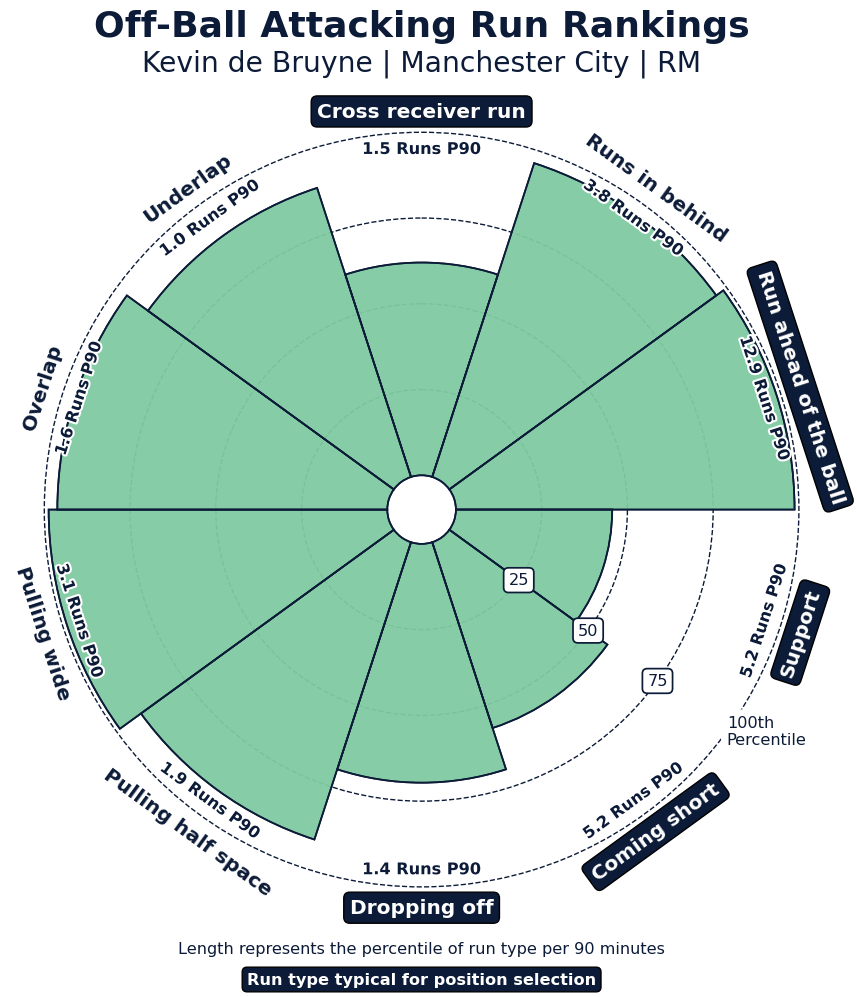

In [34]:
# Player we want to generate radar for.
player_id = 5811
# The team of Kevin de Bruyne (some players play for multiple teams in the same season).
team_id = 40
# Position to compare Kevin de Bruyne in (some players play in multiple positions).
player_position = 'RM'
# Positions of players to compare Kevin de Bruyne against. Here we will compare against all forwards
position_to_compare = ['LM', 'RM']
# The theme of the plot ('Light' or 'Dark').
theme = 'Light'

# Generate the radar for Kevin de Bruyne as a RM playing for Manchester City.
# Ranking against players who have played LM or RM in the top 5 leagues in season 2022/2023.
fig, ax = sc_radar_tool.rank_players_generate_radar(player_id,
                                                    team_id,
                                                    player_position,
                                                    position_to_compare, 
                                                    theme)